<a href="https://colab.research.google.com/github/vishu17-vains/Deep-learning/blob/main/Number_plate_detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Number Plate Detection using OpenCV
    Number plate detection using OpenCV involves using computer vision techniques to locate and extract the
    license plate region from an image or video frame.

In [7]:
# Install pytesseract if it's not already installed
!pip install pytesseract
!pip install opencv-python-headless
!sudo apt install tesseract-ocr
import cv2
import imutils #We will need this library to resize our images.
import pytesseract #We will need this library to extract the license plate text from the detected license plate.



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\LENOVO T480\Downloads\tesseract-ocr-w64-setup-5.3.1.20230401'

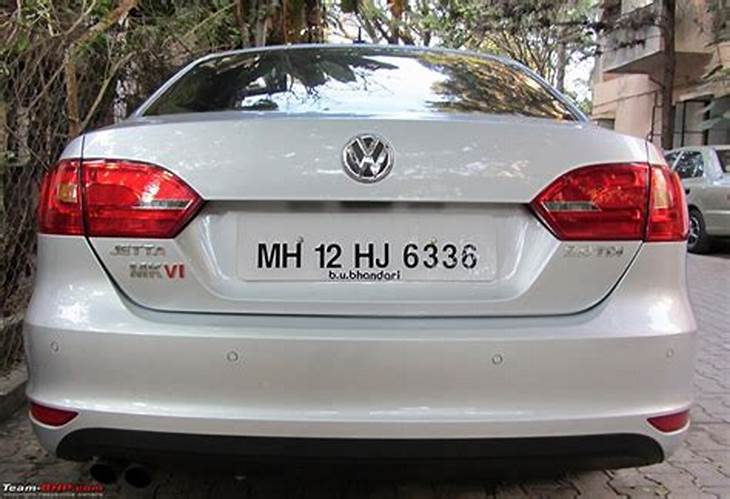

-1

In [35]:
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/carimage2.jpg")
resized_image = imutils.resize(image)
cv2_imshow(image)
cv2.waitKey(0)

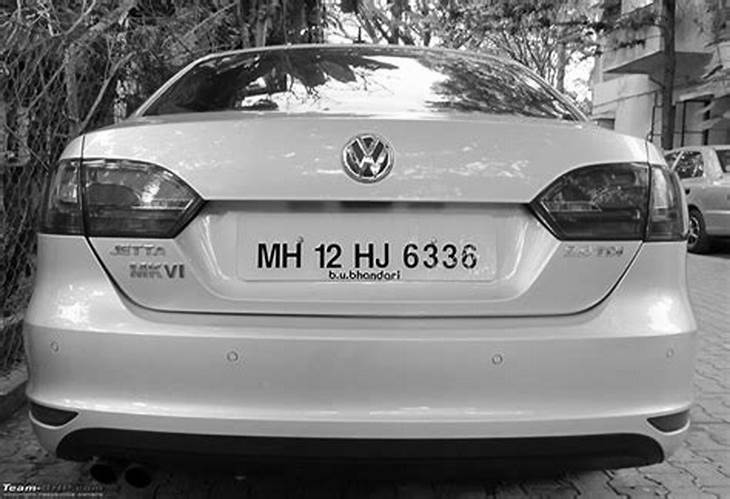

-1

In [36]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow( gray_image)
cv2.waitKey(0)

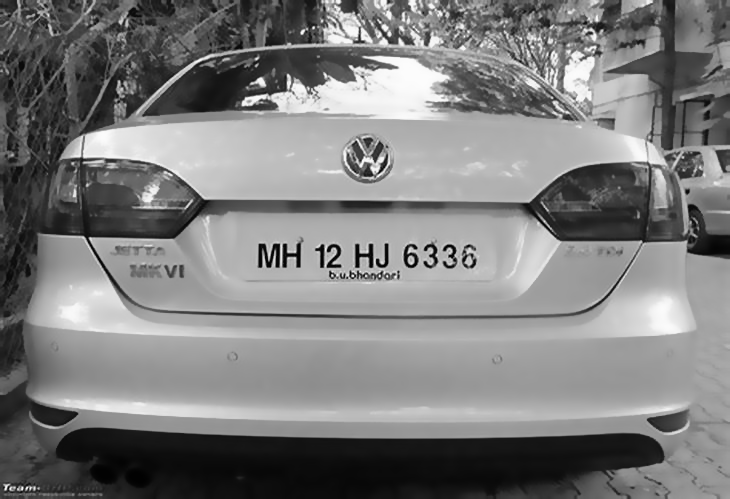

-1

In [37]:
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17)
cv2_imshow( gray_image)
cv2.waitKey(0)

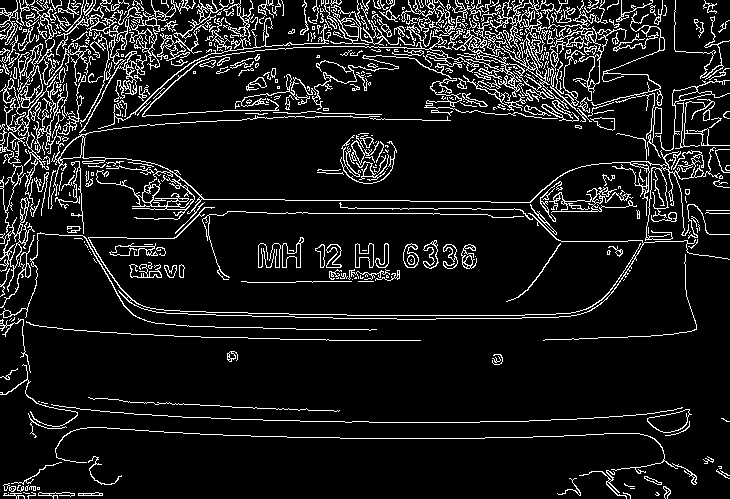

-1

In [38]:
edged = cv2.Canny(gray_image, 30, 200)
cv2_imshow( edged)
cv2.waitKey(0)

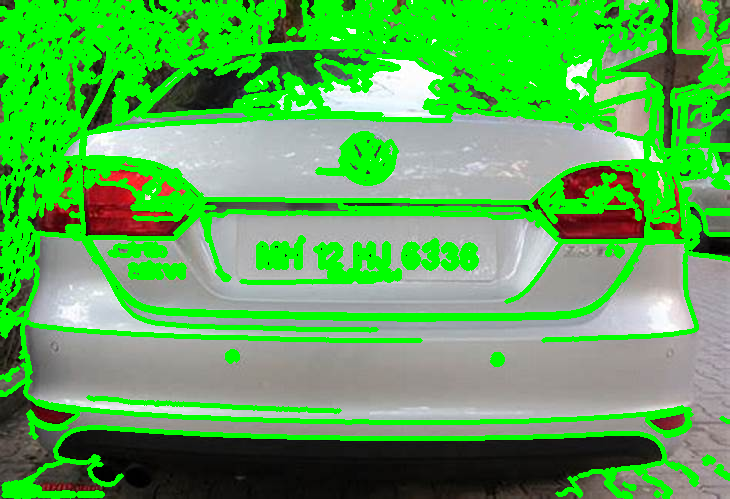

-1

In [39]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2_imshow(image1)
cv2.waitKey(0)

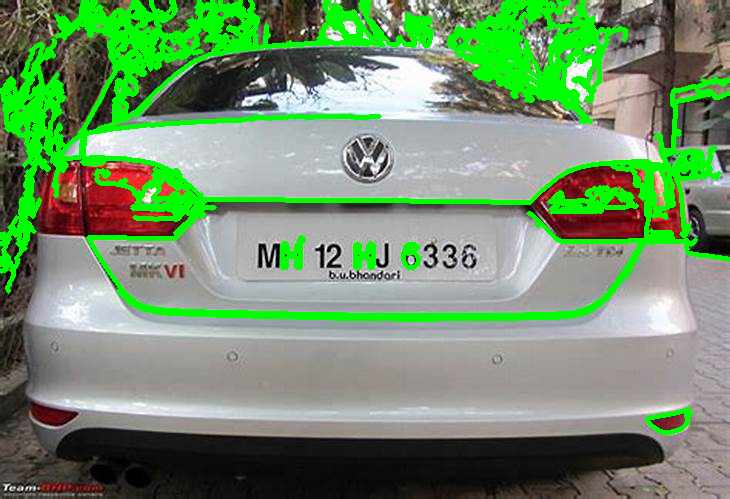

-1

In [40]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cv2_imshow(image2)
cv2.waitKey(0)

In [41]:
i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4:
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c)
                new_img=image[y:y+h,x:x+w]
                cv2.imwrite('./'+str(i)+'.png',new_img)
                i+=1
                break


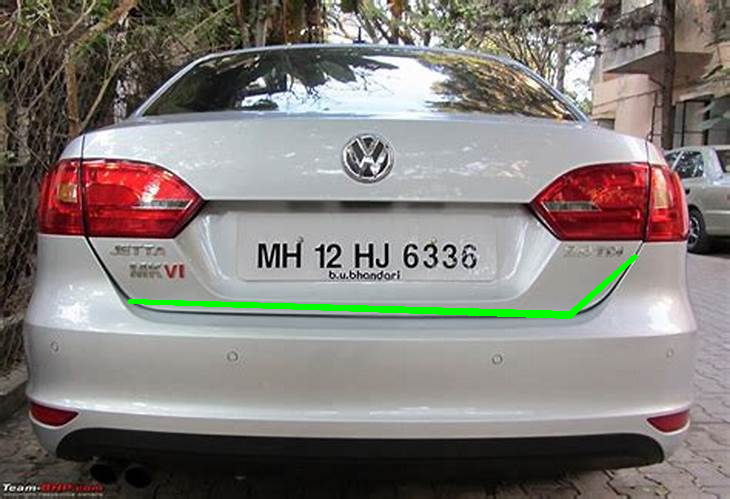

In [42]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()